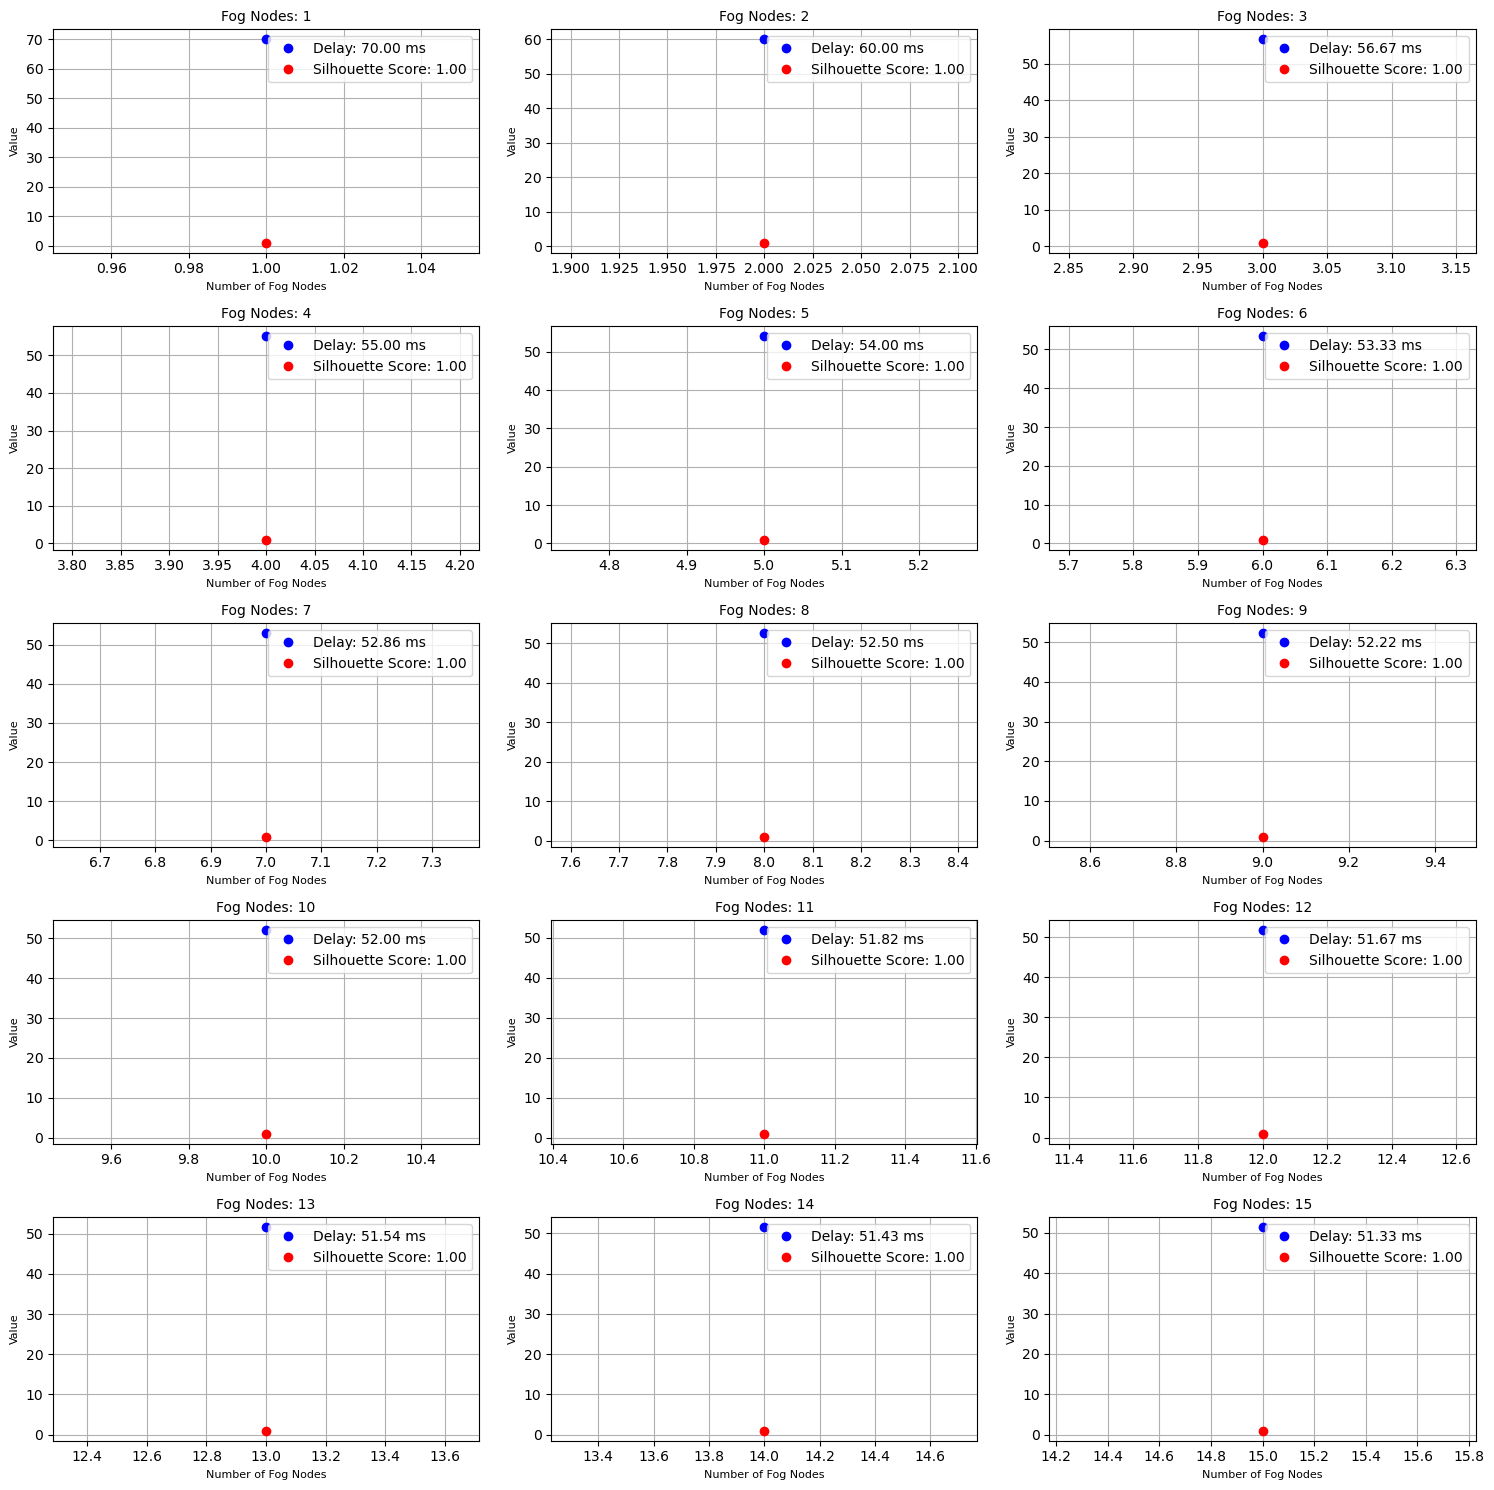

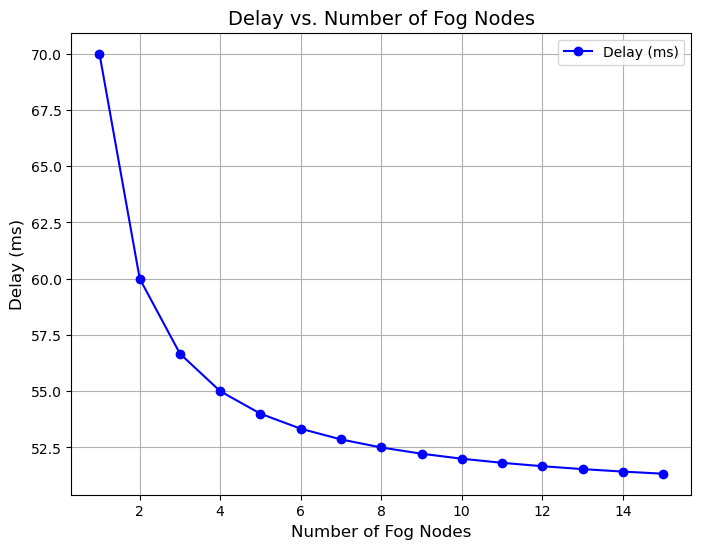

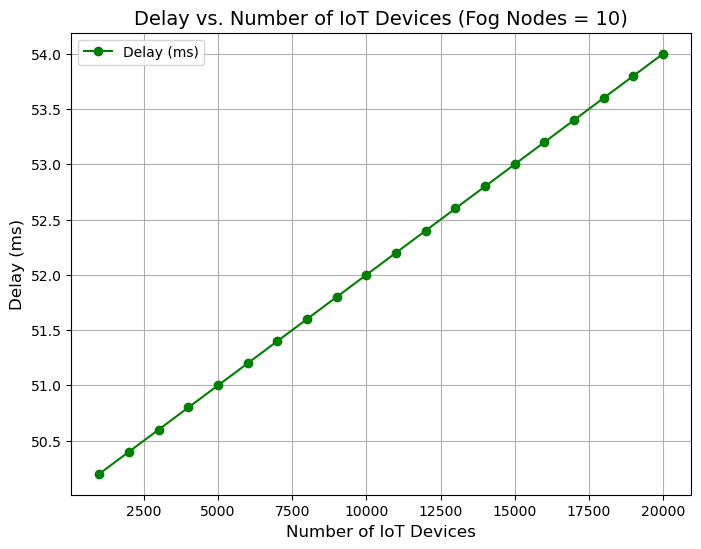

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the simulation
lambda_device = 10000  # Expected number of IoT devices in 1 km² (this is the baseline)
fog_nodes_range = range(1, 16)  # Number of fog nodes from 1 to 15
n_devices = lambda_device  # The number of devices (fixed at 10,000 for some scenarios)
C = 500  # Processing capacity of each fog node (500 devices per node per unit time)
T_comm = 50  # Fixed communication delay (constant value in ms)

# Function to calculate the delay and silhouette-like score based on the number of fog nodes
def calculate_delay_and_silhouette(n_devices, fog_nodes, C, T_comm):
    """
    Calculates the delay based on the number of devices, fog nodes, 
    processing capacity of fog nodes, and fixed communication delay. Also computes 
    a silhouette-like score based on load balance.
    
    Parameters:
    n_devices (int): Number of IoT devices
    fog_nodes (int): Number of fog nodes
    C (int): Processing capacity of each fog node
    T_comm (int): Fixed communication delay
    
    Returns:
    tuple: (delay in ms, silhouette-like score based on load variance)
    """
    if fog_nodes > 0:
        # Calculate delay
        delay = (n_devices / (fog_nodes * C)) + T_comm
        
        # Simulate the distribution of devices across fog nodes
        load_per_node = n_devices // fog_nodes
        
        # Simulate the variance in load across all fog nodes
        load_distribution = np.full(fog_nodes, load_per_node)
        variance = np.var(load_distribution)
        
        # Silhouette-like score: Higher variance means poor balance, so we subtract it
        silhouette_score = max(0, 1 - (variance / load_per_node))
        
    else:
        delay = float('inf')  # No fog nodes would result in a large delay or infinite delay
        silhouette_score = 0  # No load balance without fog nodes
    
    return delay, silhouette_score

# Store delays and silhouette-like scores for each number of fog nodes
delays = []
silhouette_scores = []

for fog in fog_nodes_range:
    delay, silhouette_score = calculate_delay_and_silhouette(n_devices, fog, C, T_comm)
    delays.append(delay)
    silhouette_scores.append(silhouette_score)

# Plotting the results: 15 separate graphs for each number of fog nodes
fig, axes = plt.subplots(5, 3, figsize=(15, 15))

# Flatten axes for easy access
axes = axes.flatten()

for i, fog in enumerate(fog_nodes_range):
    ax = axes[i]
    # Calculate delay and silhouette score
    delay, silhouette_score = delays[i], silhouette_scores[i]
    
    ax.plot([fog], [delay], 'bo', label=f'Delay: {delay:.2f} ms')
    ax.plot([fog], [silhouette_score], 'ro', label=f'Silhouette Score: {silhouette_score:.2f}')
    
    ax.set_title(f'Fog Nodes: {fog}', fontsize=10)
    ax.set_xlabel('Number of Fog Nodes', fontsize=8)
    ax.set_ylabel('Value', fontsize=8)
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Plotting the relationship between Delay and Number of Fog Nodes
plt.figure(figsize=(8, 6))
plt.plot(fog_nodes_range, delays, marker='o', linestyle='-', color='b', label='Delay (ms)')
plt.title('Delay vs. Number of Fog Nodes', fontsize=14)
plt.xlabel('Number of Fog Nodes', fontsize=12)
plt.ylabel('Delay (ms)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Now, let's test how changing the number of IoT devices affects the delay while keeping the number of fog nodes constant
# Keep fog nodes constant (let's assume 10 fog nodes for this example)
fog_nodes_constant = 10
device_range = range(1000, 20001, 1000)  # Varying number of IoT devices from 1,000 to 20,000

# Calculate delay for each number of IoT devices
device_delays = []
for devices in device_range:
    delay, _ = calculate_delay_and_silhouette(devices, fog_nodes_constant, C, T_comm)
    device_delays.append(delay)

# Plot the relationship between Delay and Number of IoT Devices
plt.figure(figsize=(8, 6))
plt.plot(device_range, device_delays, marker='o', linestyle='-', color='g', label='Delay (ms)')
plt.title('Delay vs. Number of IoT Devices (Fog Nodes = 10)', fontsize=14)
plt.xlabel('Number of IoT Devices', fontsize=12)
plt.ylabel('Delay (ms)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


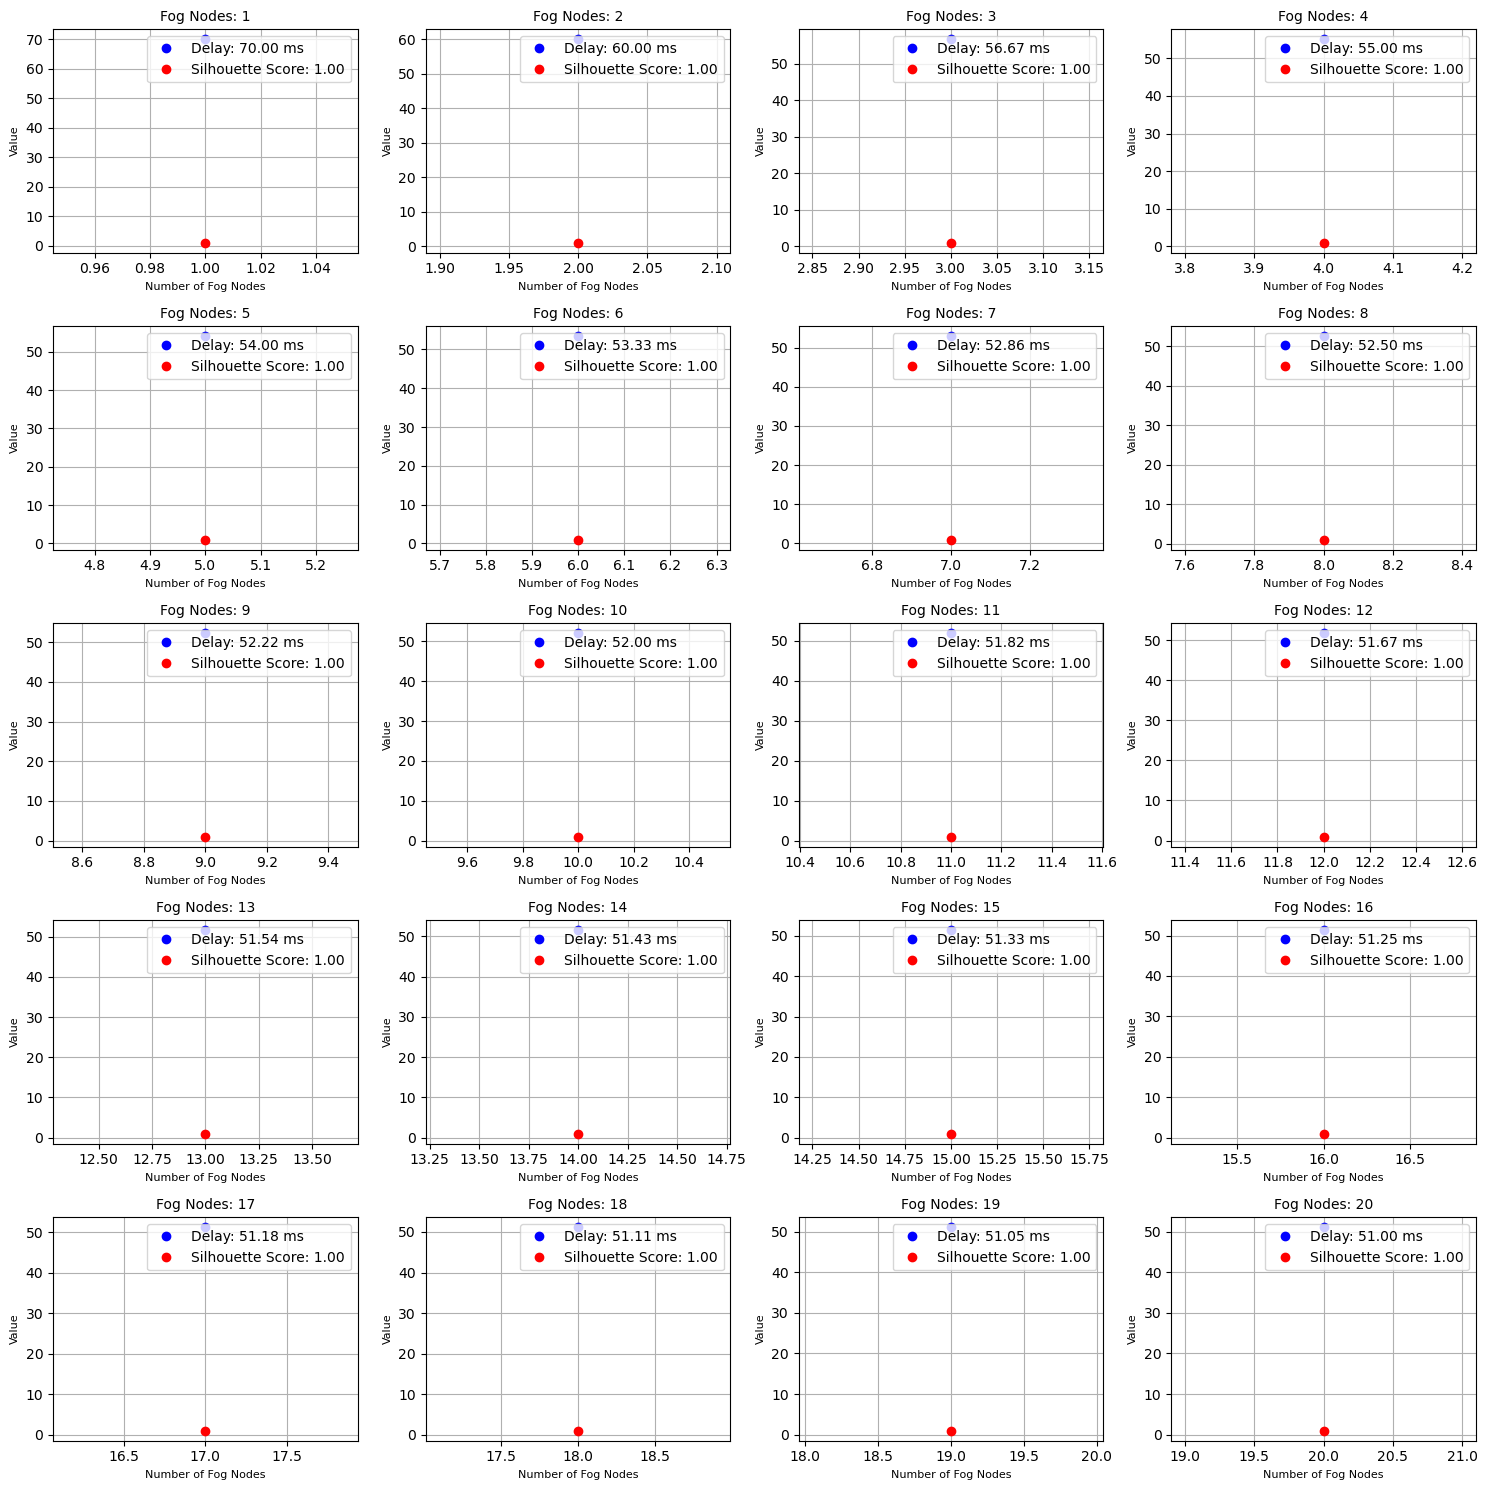

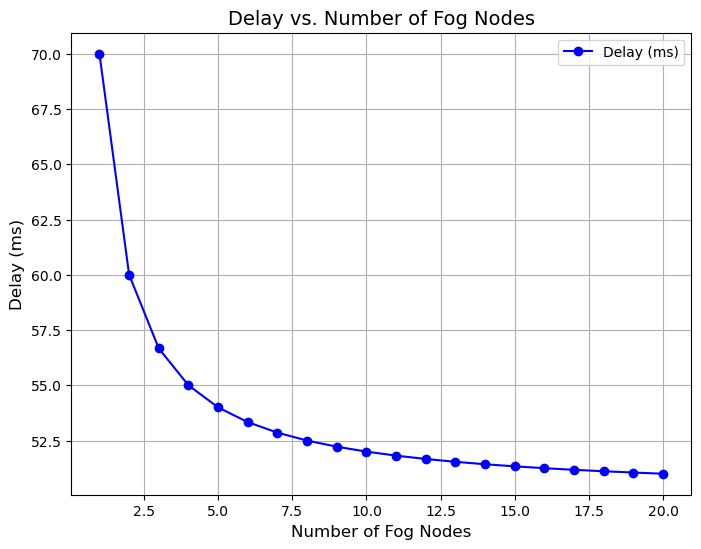

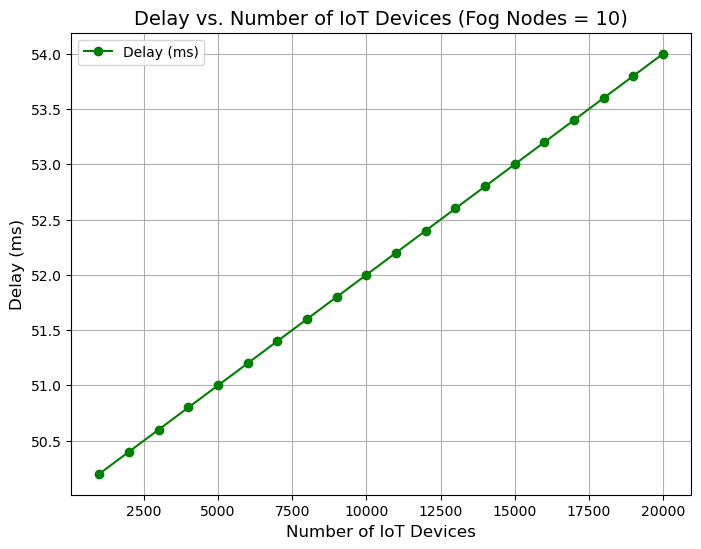

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the simulation
lambda_device = 10000  # Expected number of IoT devices in 1 km² (this is the baseline)
fog_nodes_range = range(1, 21)  # Number of fog nodes from 1 to 20
n_devices = lambda_device  # The number of devices (fixed at 10,000 for some scenarios)
C = 500  # Processing capacity of each fog node (500 devices per node per unit time)
T_comm = 50  # Fixed communication delay (constant value in ms)

# Function to calculate the delay and silhouette-like score based on the number of fog nodes
def calculate_delay_and_silhouette(n_devices, fog_nodes, C, T_comm):
    """
    Calculates the delay based on the number of devices, fog nodes, 
    processing capacity of fog nodes, and fixed communication delay. Also computes 
    a silhouette-like score based on load balance.
    
    Parameters:
    n_devices (int): Number of IoT devices
    fog_nodes (int): Number of fog nodes
    C (int): Processing capacity of each fog node
    T_comm (int): Fixed communication delay
    
    Returns:
    tuple: (delay in ms, silhouette-like score based on load variance)
    """
    if fog_nodes > 0:
        # Calculate delay
        delay = (n_devices / (fog_nodes * C)) + T_comm
        
        # Simulate the distribution of devices across fog nodes
        load_per_node = n_devices // fog_nodes
        
        # Simulate the variance in load across all fog nodes
        load_distribution = np.full(fog_nodes, load_per_node)
        variance = np.var(load_distribution)
        
        # Silhouette-like score: Higher variance means poor balance, so we subtract it
        silhouette_score = max(0, 1 - (variance / load_per_node))
        
    else:
        delay = float('inf')  # No fog nodes would result in a large delay or infinite delay
        silhouette_score = 0  # No load balance without fog nodes
    
    return delay, silhouette_score

# Store delays and silhouette-like scores for each number of fog nodes
delays = []
silhouette_scores = []

for fog in fog_nodes_range:
    delay, silhouette_score = calculate_delay_and_silhouette(n_devices, fog, C, T_comm)
    delays.append(delay)
    silhouette_scores.append(silhouette_score)

# Plotting the results: 20 separate graphs for each number of fog nodes
fig, axes = plt.subplots(5, 4, figsize=(15, 15))  # Adjusted layout for 20 plots

# Flatten axes for easy access
axes = axes.flatten()

for i, fog in enumerate(fog_nodes_range):
    ax = axes[i]
    # Calculate delay and silhouette score
    delay, silhouette_score = delays[i], silhouette_scores[i]
    
    ax.plot([fog], [delay], 'bo', label=f'Delay: {delay:.2f} ms')
    ax.plot([fog], [silhouette_score], 'ro', label=f'Silhouette Score: {silhouette_score:.2f}')
    
    ax.set_title(f'Fog Nodes: {fog}', fontsize=10)
    ax.set_xlabel('Number of Fog Nodes', fontsize=8)
    ax.set_ylabel('Value', fontsize=8)
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Plotting the relationship between Delay and Number of Fog Nodes
plt.figure(figsize=(8, 6))
plt.plot(fog_nodes_range, delays, marker='o', linestyle='-', color='b', label='Delay (ms)')
plt.title('Delay vs. Number of Fog Nodes', fontsize=14)
plt.xlabel('Number of Fog Nodes', fontsize=12)
plt.ylabel('Delay (ms)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Now, let's test how changing the number of IoT devices affects the delay while keeping the number of fog nodes constant
# Keep fog nodes constant (let's assume 10 fog nodes for this example)
fog_nodes_constant = 10
device_range = range(1000, 20001, 1000)  # Varying number of IoT devices from 1,000 to 20,000

# Calculate delay for each number of IoT devices
device_delays = []
for devices in device_range:
    delay, _ = calculate_delay_and_silhouette(devices, fog_nodes_constant, C, T_comm)
    device_delays.append(delay)

# Plot the relationship between Delay and Number of IoT Devices
plt.figure(figsize=(8, 6))
plt.plot(device_range, device_delays, marker='o', linestyle='-', color='g', label='Delay (ms)')
plt.title('Delay vs. Number of IoT Devices (Fog Nodes = 10)', fontsize=14)
plt.xlabel('Number of IoT Devices', fontsize=12)
plt.ylabel('Delay (ms)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


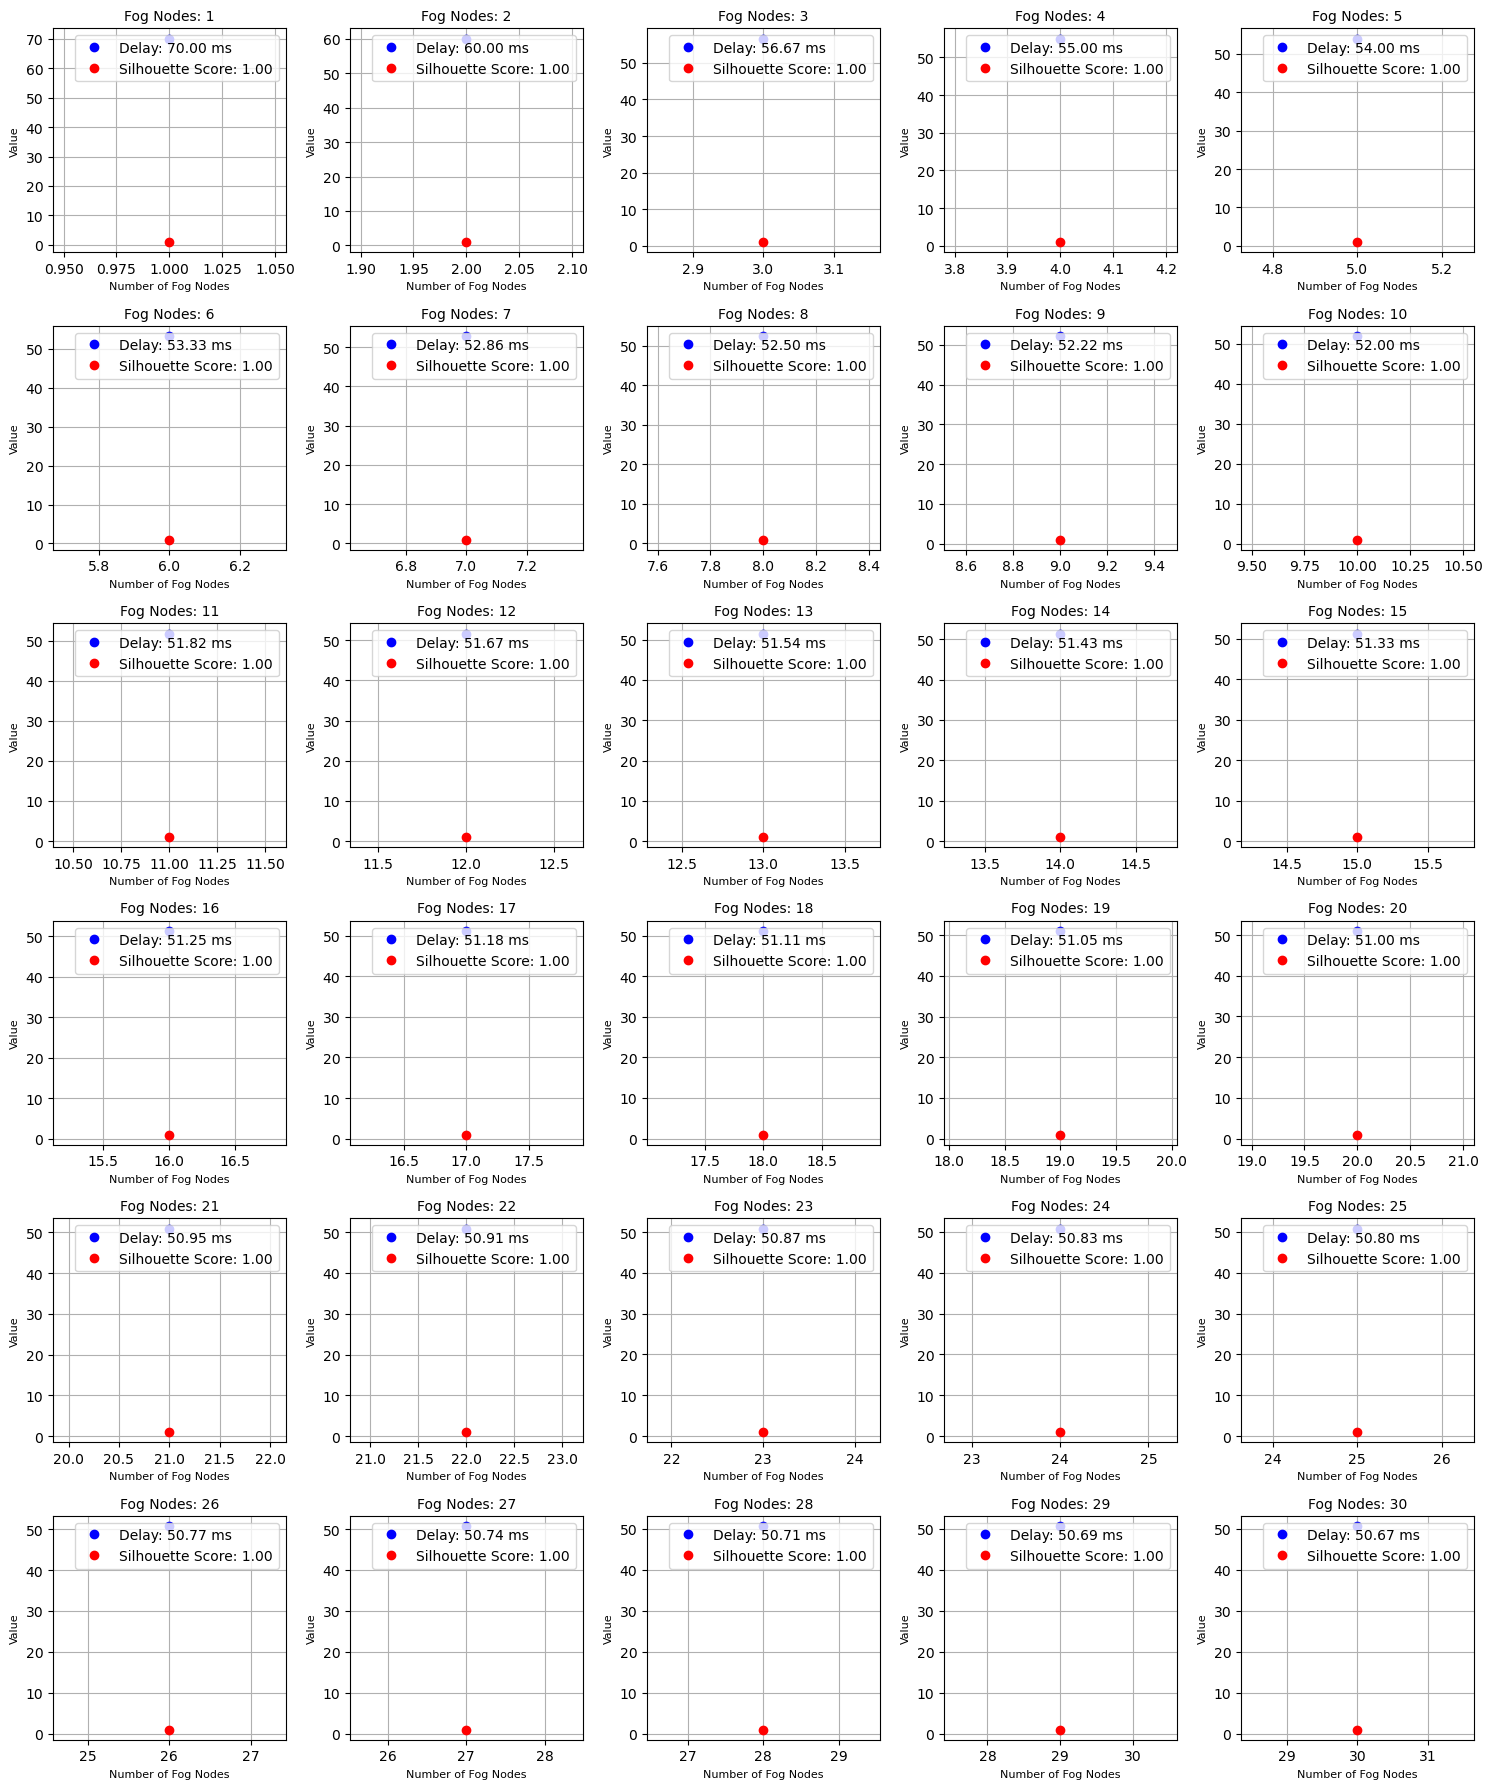

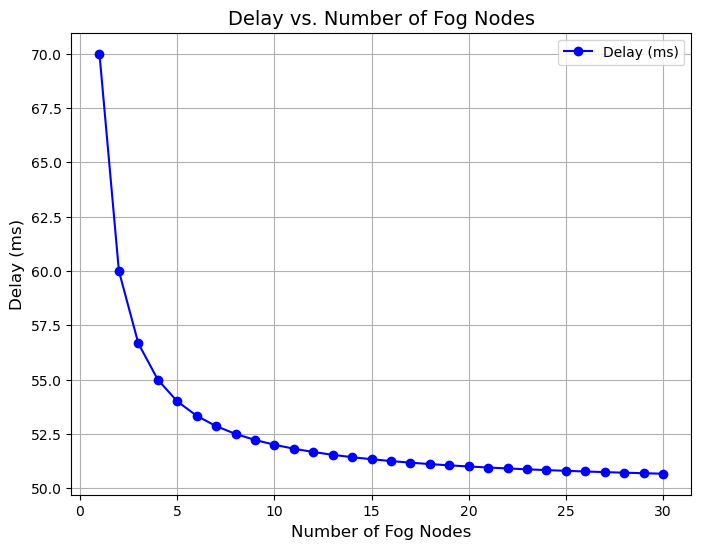

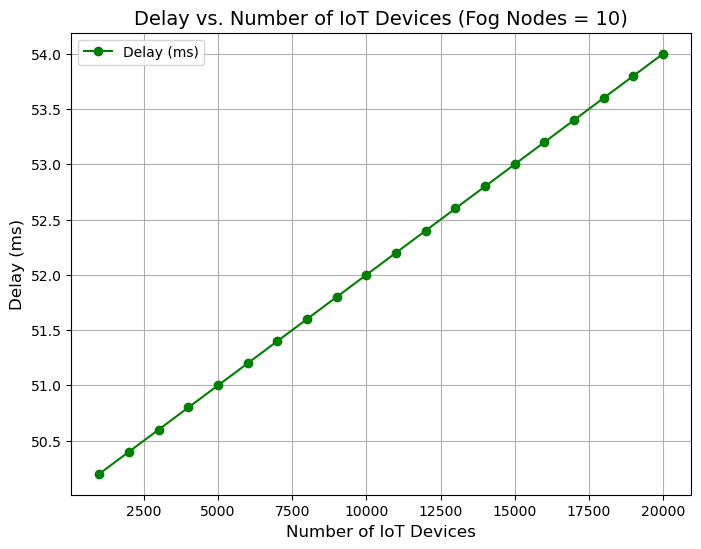

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the simulation
lambda_device = 10000  # Expected number of IoT devices in 1 km² (this is the baseline)
fog_nodes_range = range(1, 31)  # Number of fog nodes from 1 to 30
n_devices = lambda_device  # The number of devices (fixed at 10,000 for some scenarios)
C = 500  # Processing capacity of each fog node (500 devices per node per unit time)
T_comm = 50  # Fixed communication delay (constant value in ms)

# Function to calculate the delay and silhouette-like score based on the number of fog nodes
def calculate_delay_and_silhouette(n_devices, fog_nodes, C, T_comm):
    """
    Calculates the delay based on the number of devices, fog nodes, 
    processing capacity of fog nodes, and fixed communication delay. Also computes 
    a silhouette-like score based on load balance.
    
    Parameters:
    n_devices (int): Number of IoT devices
    fog_nodes (int): Number of fog nodes
    C (int): Processing capacity of each fog node
    T_comm (int): Fixed communication delay
    
    Returns:
    tuple: (delay in ms, silhouette-like score based on load variance)
    """
    if fog_nodes > 0:
        # Calculate delay
        delay = (n_devices / (fog_nodes * C)) + T_comm
        
        # Simulate the distribution of devices across fog nodes
        load_per_node = n_devices // fog_nodes
        
        # Simulate the variance in load across all fog nodes
        load_distribution = np.full(fog_nodes, load_per_node)
        variance = np.var(load_distribution)
        
        # Silhouette-like score: Higher variance means poor balance, so we subtract it
        silhouette_score = max(0, 1 - (variance / load_per_node))
        
    else:
        delay = float('inf')  # No fog nodes would result in a large delay or infinite delay
        silhouette_score = 0  # No load balance without fog nodes
    
    return delay, silhouette_score

# Store delays and silhouette-like scores for each number of fog nodes
delays = []
silhouette_scores = []

for fog in fog_nodes_range:
    delay, silhouette_score = calculate_delay_and_silhouette(n_devices, fog, C, T_comm)
    delays.append(delay)
    silhouette_scores.append(silhouette_score)

# Plotting the results: 30 separate graphs for each number of fog nodes
fig, axes = plt.subplots(6, 5, figsize=(15, 18))  # Adjusted layout for 30 plots

# Flatten axes for easy access
axes = axes.flatten()

for i, fog in enumerate(fog_nodes_range):
    ax = axes[i]
    # Calculate delay and silhouette score
    delay, silhouette_score = delays[i], silhouette_scores[i]
    
    ax.plot([fog], [delay], 'bo', label=f'Delay: {delay:.2f} ms')
    ax.plot([fog], [silhouette_score], 'ro', label=f'Silhouette Score: {silhouette_score:.2f}')
    
    ax.set_title(f'Fog Nodes: {fog}', fontsize=10)
    ax.set_xlabel('Number of Fog Nodes', fontsize=8)
    ax.set_ylabel('Value', fontsize=8)
    ax.legend(loc='upper right')
    ax.grid(True)

plt.tight_layout()
plt.show()

# Plotting the relationship between Delay and Number of Fog Nodes
plt.figure(figsize=(8, 6))
plt.plot(fog_nodes_range, delays, marker='o', linestyle='-', color='b', label='Delay (ms)')
plt.title('Delay vs. Number of Fog Nodes', fontsize=14)
plt.xlabel('Number of Fog Nodes', fontsize=12)
plt.ylabel('Delay (ms)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

# Now, let's test how changing the number of IoT devices affects the delay while keeping the number of fog nodes constant
# Keep fog nodes constant (let's assume 10 fog nodes for this example)
fog_nodes_constant = 10
device_range = range(1000, 20001, 1000)  # Varying number of IoT devices from 1,000 to 20,000

# Calculate delay for each number of IoT devices
device_delays = []
for devices in device_range:
    delay, _ = calculate_delay_and_silhouette(devices, fog_nodes_constant, C, T_comm)
    device_delays.append(delay)

# Plot the relationship between Delay and Number of IoT Devices
plt.figure(figsize=(8, 6))
plt.plot(device_range, device_delays, marker='o', linestyle='-', color='g', label='Delay (ms)')
plt.title('Delay vs. Number of IoT Devices (Fog Nodes = 10)', fontsize=14)
plt.xlabel('Number of IoT Devices', fontsize=12)
plt.ylabel('Delay (ms)', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()
